In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
#reflect the tables intointo classes and save a reference to those classes
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [18]:
#inspect the db
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [19]:
# Get a lists of column names and types for measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
# Get a lists of column names and types in station
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#find the most recent date
mostrecent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mostrecent_date

('2017-08-23')

In [30]:
#calculate the date 1 year  from the most recent date found in the db
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date 

datetime.date(2016, 8, 23)

In [32]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).order_by(Measurement.date).all()

for perc in precipitation:
    print(perc.date, perc.prcp)

2016-08-23 0.0
2016-08-23 0.15
2016-08-23 0.05
2016-08-23 None
2016-08-23 0.02
2016-08-23 1.79
2016-08-23 0.7
2016-08-24 0.08
2016-08-24 2.15
2016-08-24 2.28
2016-08-24 None
2016-08-24 1.22
2016-08-24 2.15
2016-08-24 1.45
2016-08-25 0.08
2016-08-25 0.08
2016-08-25 0.0
2016-08-25 0.0
2016-08-25 0.21
2016-08-25 0.06
2016-08-25 0.11
2016-08-26 0.0
2016-08-26 0.03
2016-08-26 0.02
2016-08-26 0.04
2016-08-26 0.0
2016-08-26 0.01
2016-08-27 0.0
2016-08-27 0.18
2016-08-27 0.02
2016-08-27 0.0
2016-08-27 0.12
2016-08-27 None
2016-08-28 0.01
2016-08-28 0.14
2016-08-28 0.14
2016-08-28 0.14
2016-08-28 0.6
2016-08-28 2.07
2016-08-29 0.0
2016-08-29 0.17
2016-08-29 0.04
2016-08-29 None
2016-08-29 0.0
2016-08-29 0.35
2016-08-29 0.9
2016-08-30 0.0
2016-08-30 0.0
2016-08-30 0.02
2016-08-30 0.0
2016-08-30 0.0
2016-08-30 0.05
2016-08-31 0.13
2016-08-31 0.1
2016-08-31 None
2016-08-31 None
2016-08-31 0.25
2016-08-31 0.24
2016-08-31 2.46
2016-09-01 0.0
2016-09-01 0.0
2016-09-01 0.0
2016-09-01 None
2016-09-01 0

2017-06-05 0.02
2017-06-05 None
2017-06-05 0.0
2017-06-05 0.05
2017-06-05 0.01
2017-06-06 0.0
2017-06-06 0.0
2017-06-06 0.0
2017-06-06 None
2017-06-06 0.0
2017-06-06 0.0
2017-06-06 0.0
2017-06-07 0.0
2017-06-07 0.0
2017-06-07 0.0
2017-06-07 None
2017-06-07 0.0
2017-06-07 0.0
2017-06-07 0.01
2017-06-08 0.0
2017-06-08 0.02
2017-06-08 0.01
2017-06-08 None
2017-06-08 0.0
2017-06-08 0.0
2017-06-08 0.0
2017-06-09 0.0
2017-06-09 0.02
2017-06-09 0.0
2017-06-09 None
2017-06-09 0.0
2017-06-09 0.02
2017-06-10 0.04
2017-06-10 0.21
2017-06-10 0.53
2017-06-10 0.13
2017-06-10 0.62
2017-06-10 None
2017-06-11 0.08
2017-06-11 0.24
2017-06-11 0.14
2017-06-11 0.25
2017-06-11 0.74
2017-06-11 0.7
2017-06-12 0.02
2017-06-12 0.19
2017-06-12 0.35
2017-06-12 0.14
2017-06-12 0.24
2017-06-12 0.81
2017-06-13 0.0
2017-06-13 0.36
2017-06-13 0.1
2017-06-13 None
2017-06-13 0.03
2017-06-13 0.24
2017-06-13 0.65
2017-06-14 0.0
2017-06-14 0.27
2017-06-14 0.21
2017-06-14 None
2017-06-14 0.06
2017-06-14 0.22
2017-06-14 0.81

In [53]:
# Save the query results as a Pandas DataFrame 
precipitation_df = pd.DataFrame(precipitation)

## Drop null values.
precipitation_df = precipitation_df.dropna(how="any")

precipitation_df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28
11,2016-08-24,1.22


In [54]:
#set the index to the date column and Sort the dataframe by daet
precipitation_df = precipitation_df.set_index("date")

percipitation_df = precipitation_df.sort_index(ascending = True)

precipitation_df.head(15)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


<Figure size 720x504 with 0 Axes>

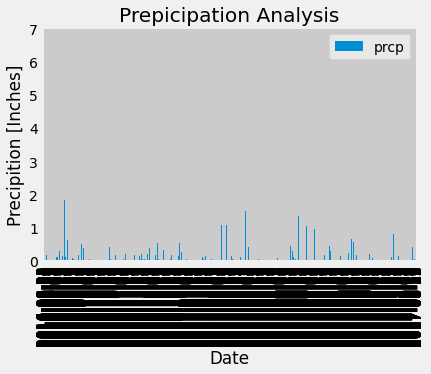

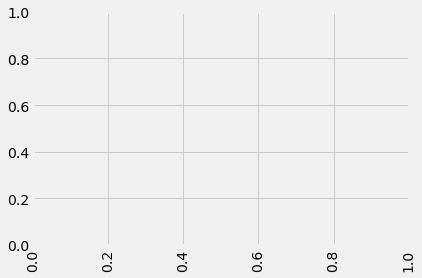

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,7))

precipitation_df.plot(kind='bar')

plt.title('Prepicipation Analysis')

plt.xlabel('Date')
plt.ylabel('Precipition [Inches]')
plt.legend()
plt.show()
plt.xticks(rotation = 90)
plt.savefig("Resources/Precipitation.png")

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
